In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_json('games.json')

In [2]:
df.columns

Index(['ID', 'name', 'release_date', 'estimated_owners', 'peak_ccu',
       'required_age', 'price', 'dlc_count', 'main_description',
       'supported_languages', 'full_audio_languages', 'reviews',
       'header_image', 'website', 'support_url', 'support_email', 'windows',
       'mac', 'linux', 'metacritic_score', 'metacriticURL', 'user_score',
       'positive', 'negative', 'score_rank', 'achievements', 'recommendations',
       'notes', 'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'tags', 'screenshots'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97410 entries, 0 to 97409
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        97410 non-null  int64  
 1   name                      97404 non-null  object 
 2   release_date              97410 non-null  object 
 3   estimated_owners          97410 non-null  object 
 4   peak_ccu                  97410 non-null  int64  
 5   required_age              97410 non-null  int64  
 6   price                     97410 non-null  float64
 7   dlc_count                 97410 non-null  int64  
 8   main_description          92540 non-null  object 
 9   supported_languages       97410 non-null  object 
 10  full_audio_languages      97410 non-null  object 
 11  reviews                   10125 non-null  object 
 12  header_image              97410 non-null  object 
 13  website                   42737 non-null  object 
 14  suppor

In [4]:
df[df['ID'] == 22380]

,ID,name,release_date,estimated_owners,peak_ccu,required_age,price,dlc_count,main_description,supported_languages,...,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,packages,developers,publishers,categories,genres,tags,screenshots
1025,22380,Fallout: New Vegas,"Oct 19, 2010",2000000 - 5000000,5776,16,9.99,0,Welcome to Vegas. New Vegas. It’s the kind of ...,"['English', 'French', 'German', 'Italian', 'Sp...",...,3044,112,976,153,Obsidian Entertainment,Bethesda Softworks,"Single-player,Steam Achievements,Partial Contr...","Action,RPG","Open World,RPG,Post-apocalyptic,Singleplayer,M...",https://cdn.akamai.steamstatic.com/steam/apps/...


### The game with ID 22380 is Fallout: New Vegas. It has a price of 9.99. The required age for this game is 16.

In [5]:
df.loc[136]

ID                                                                       7940
name                                         Call of Duty® 4: Modern Warfare®
release_date                                                     Nov 12, 2007
estimated_owners                                            1000000 - 2000000
peak_ccu                                                                  495
required_age                                                               17
price                                                                    9.99
dlc_count                                                                   0
main_description            The new action-thriller from the award-winning...
supported_languages         ['English', 'French', 'German', 'Italian', 'Sp...
full_audio_languages                                                       []
reviews                     Winner of more than 40 E3 2007 awards : Editor...
header_image                https://cdn.akamai.steamstatic.com/s

<AxesSubplot:xlabel='price', ylabel='metacritic_score'>

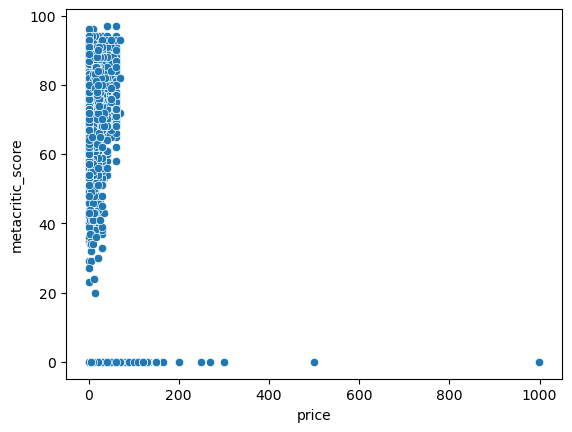

In [6]:
sns.scatterplot(data= df, x="price", y="metacritic_score")

There are a few outliers in price, one being The Leverage Game. This game cost 999.98 dollhairs, which is way above the average which is ~7 dollars

<AxesSubplot:xlabel='price', ylabel='recommendations'>

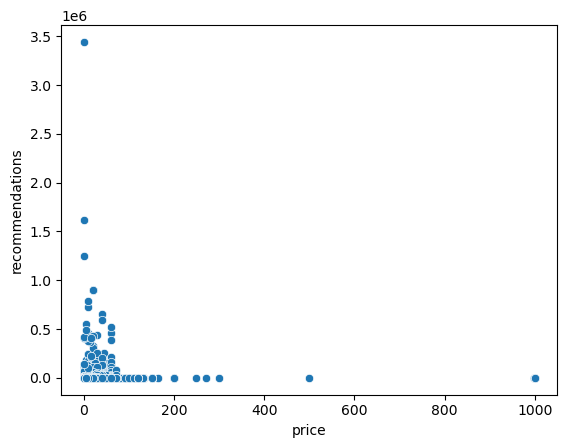

In [8]:
sns.scatterplot(data= df, x="price", y="recommendations")

There is no relationship between price and recommendations.

<AxesSubplot:xlabel='positive', ylabel='negative'>

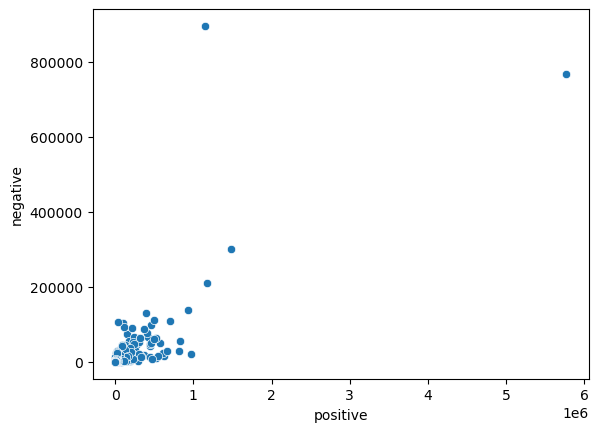

In [10]:
sns.scatterplot(data= df, x="positive", y="negative")

In [18]:
subDF = df[['positive', 'negative']]

In [19]:
subDF.corr(method = 'pearson')

,positive,negative
positive,1.000000,0.782384
negative,0.782384,1.000000


Looking at the scatterplot for positive vs. negative reviews, there appears to be a positive relationship. There was some outliers when calculating. With outliers, the relationship for positive and negative reviews is 0.78, which suggests this is a strong and positive relationship. This means positive increases for a game, while negative decreases. 

In [13]:
df["negative"].max()

895978

In [14]:
df[df['negative']==895978]

,ID,name,release_date,estimated_owners,peak_ccu,required_age,price,dlc_count,main_description,supported_languages,...,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,packages,developers,publishers,categories,genres,tags,screenshots
8885,578080,PUBG: BATTLEGROUNDS,"Dec 21, 2017",50000000 - 100000000,275374,0,0.0,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","['English', 'Korean', 'Simplified Chinese', 'F...",...,21963,790,7134,152,"KRAFTON, Inc.","KRAFTON, Inc.","Multi-player,PvP,Online PvP,Stats,Remote Play ...","Action,Adventure,Free to Play,Massively Multip...","Survival,Shooter,Multiplayer,Battle Royale,FPS...",https://cdn.akamai.steamstatic.com/steam/apps/...


In [15]:
#46158
#8885
cleanedDF = df.drop([46158,8885])

<AxesSubplot:xlabel='positive', ylabel='negative'>

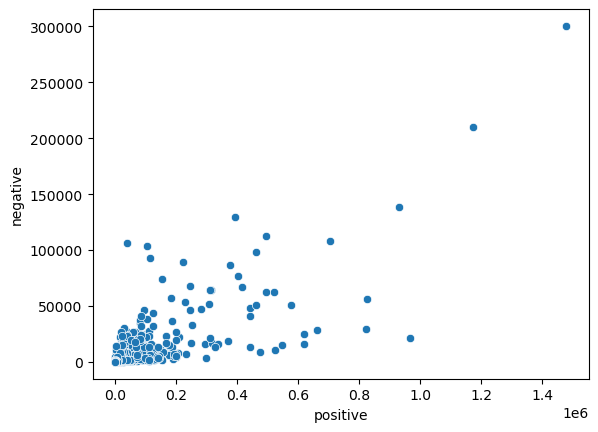

In [16]:
sns.scatterplot(data= cleanedDF, x="positive", y="negative")

<AxesSubplot:xlabel='metacritic_score', ylabel='user_score'>

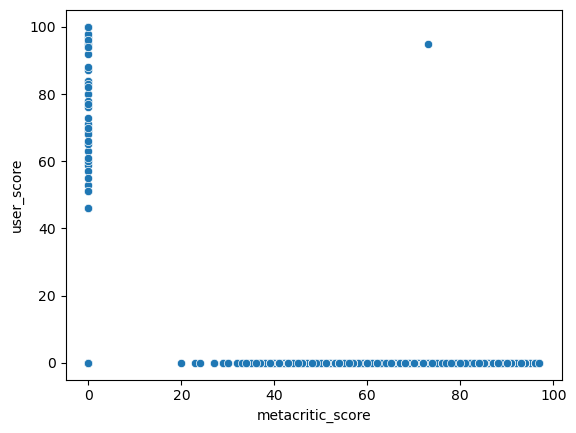

In [20]:
sns.scatterplot(data= df, x="metacritic_score", y="user_score")

If there is a user score then there wont be a metacritic score and the same if its the other way around expect for one game.